In [207]:
import sys 
print(f'Python: {sys.version}')

import numpy as np
print(f'numpy: {np.__version__}')

import pandas as pd
print(f'pandas: {pd.__version__}')

import matplotlib
print(f'matplotlib: {matplotlib.__version__}')

import seaborn as sns
print(f'seaborn: {sns.__version__}')

import sklearn as sk
print(f'sklearn: {sk.__version__}')

import sqlite3
print(f'sqlite3: {sqlite3.version}')

Python: 3.10.9 | packaged by Anaconda, Inc. | (main, Mar  1 2023, 18:18:15) [MSC v.1916 64 bit (AMD64)]
numpy: 1.23.5
pandas: 1.5.3
matplotlib: 3.7.0
seaborn: 0.12.2
sklearn: 1.2.1
sqlite3: 2.6.0


In [208]:
database_path = 'db.sqlite3'

In [209]:
conn = sqlite3.connect(database_path)

In [210]:
df_q_table = pd.read_sql_query("SELECT * from hp_quiz_app_question", conn)
df_q_table.head(7)

,id,question,correct_option
0,11,Ki NEM a főszereplő barátja a Harry Potter kön...,C
1,12,Milyen állat Csikócsőr?,D
2,13,Milyen pálcája van Hermine Grangernek?,A
3,14,Milyen patrónusa van Luna Lovegodnak?,C
4,16,Hány összetevője van a Százfűlé-főzetnek?,B
5,17,Ki volt a Roxfort igazgatója Albus Dumbledore ...,A
6,18,Melyik országban bujkált Voldemort?,B


In [211]:
df_q_table.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              8 non-null      int64 
 1   question        8 non-null      object
 2   correct_option  8 non-null      object
dtypes: int64(1), object(2)
memory usage: 320.0+ bytes


In [212]:
df_opt_table = pd.read_sql_query("SELECT * FROM hp_quiz_app_options", conn)
df_opt_table.head(4)

,id,option_a,option_b,option_c,option_d,question_id
0,19,Ron Weasley,Hermione Granger,Draco Malfoy,Luna Lovegood,11
1,20,Durrfarkú szurcsók,Macska,Patkány,Hippogriff,12
2,21,Szőlőfa sárkány-szívizomhúrral,Kőrisfa unikornisszőrrel,Fűzfa egyszarvúszőrrel,Gesztenyefa sárkányszívhúrral,13
3,22,Tigris,Egér,Nyúl,Hattyú,14


In [213]:
df_opt_table.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           7 non-null      int64 
 1   option_a     7 non-null      object
 2   option_b     7 non-null      object
 3   option_c     7 non-null      object
 4   option_d     7 non-null      object
 5   question_id  7 non-null      int64 
dtypes: int64(2), object(4)
memory usage: 464.0+ bytes


In [214]:
df_opt_table.columns

Index(['id', 'option_a', 'option_b', 'option_c', 'option_d', 'question_id'], dtype='object')

In [215]:
df_ans_table = pd.read_sql_query("SELECT * FROM hp_quiz_app_answer", conn)
df_ans_table.head()

,id,selected_option,question_id
0,1,A,11
1,2,D,12
2,3,A,13
3,4,C,14
4,5,A,11


In [216]:
df_ans_table.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 141 entries, 0 to 140
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               141 non-null    int64 
 1   selected_option  141 non-null    object
 2   question_id      141 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 3.4+ KB


In [217]:
df_ans_qs = '''
SELECT substr(Question.question, 1, 15) AS 'Kérdés', Question.correct_option AS 'Helyes válasz', Answer.selected_option AS 'Beérkezett válasz' 
FROM hp_quiz_app_question AS Question
JOIN hp_quiz_app_answer AS Answer
ON (Answer.question_id = Question.id);
'''

pd.read_sql_query(df_ans_qs, conn)

,Kérdés,Helyes válasz,Beérkezett válasz
0,Ki NEM a főszer,C,A
1,Milyen állat Cs,D,D
2,Milyen pálcája,A,A
3,Milyen patrónus,C,C
4,Ki NEM a főszer,C,A
...,...,...,...
136,Milyen pálcája,A,A
137,Milyen patrónus,C,A
138,Hány összetevőj,B,A
139,Ki volt a Roxfo,A,A


In [218]:
type(df_ans_qs)

str

In [219]:
df_ansqs = '''
SELECT substr(Question.question, 1, 15) AS 'Kérdés', Question.correct_option AS 'Helyes válasz', Answer.selected_option AS 'Beérkezett válasz'  
FROM hp_quiz_app_question AS Question
JOIN hp_quiz_app_answer AS Answer
ON (Answer.question_id = Question.id);
'''

df_ansqs = pd.read_sql_query(df_ansqs, conn)
print(df_ansqs)

              Kérdés Helyes válasz Beérkezett válasz
0    Ki NEM a főszer             C                 A
1    Milyen állat Cs             D                 D
2    Milyen pálcája              A                 A
3    Milyen patrónus             C                 C
4    Ki NEM a főszer             C                 A
..               ...           ...               ...
136  Milyen pálcája              A                 A
137  Milyen patrónus             C                 A
138  Hány összetevőj             B                 A
139  Ki volt a Roxfo             A                 A
140  Melyik országba             B                 A

[141 rows x 3 columns]


In [220]:
type(df_ans_qs)

str

In [222]:
dfall = '''
SELECT
    Question.id,
    substr(Question.question, 1, 15) AS 'Kérdés',
    Question.correct_option AS 'Helyes válasz',
    Answer.selected_option AS 'Beérkezett válasz',
    SUM(CASE WHEN Answer.selected_option = Question.correct_option THEN 1 ELSE 0 END) AS 'Helyes válaszok száma',
    COUNT(Answer.selected_option) AS 'Beérkezett válaszok száma'    
FROM
    hp_quiz_app_question AS Question
JOIN
    hp_quiz_app_answer AS Answer ON (Answer.question_id = Question.id)
GROUP BY
    Kérdés, 'Helyes válasz';
'''

dfall = pd.read_sql_query(dfall, conn)

dfall.head(10)

,id,Kérdés,Helyes válasz,Beérkezett válasz,Helyes válaszok száma,Beérkezett válaszok száma
0,16,Hány összetevőj,B,D,12,19
1,11,Ki NEM a főszer,C,A,18,21
2,17,Ki volt a Roxfo,A,A,17,19
3,18,Melyik országba,B,B,10,19
4,14,Milyen patrónus,C,C,11,21
5,13,Milyen pálcája,A,A,11,21
6,12,Milyen állat Cs,D,D,16,21


In [223]:
type(dfall)

pandas.core.frame.DataFrame

In [224]:
dfall.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 6 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   id                         7 non-null      int64 
 1   Kérdés                     7 non-null      object
 2   Helyes válasz              7 non-null      object
 3   Beérkezett válasz          7 non-null      object
 4   Helyes válaszok száma      7 non-null      int64 
 5   Beérkezett válaszok száma  7 non-null      int64 
dtypes: int64(3), object(3)
memory usage: 464.0+ bytes


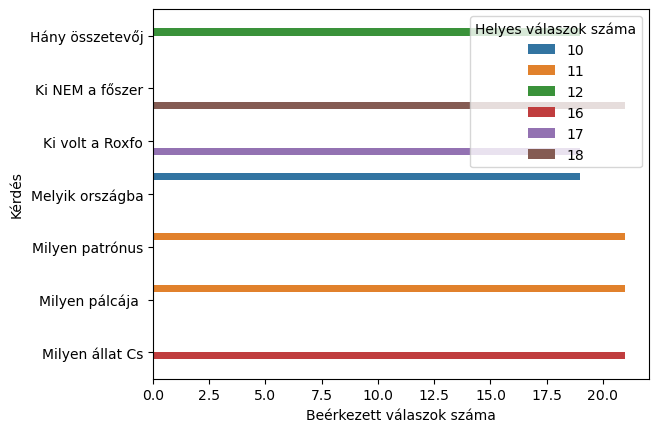

In [227]:
import matplotlib.pyplot as plt

sns.barplot(x='Beérkezett válaszok száma', y='Kérdés', data=dfall, hue='Helyes válaszok száma')
plt.show()

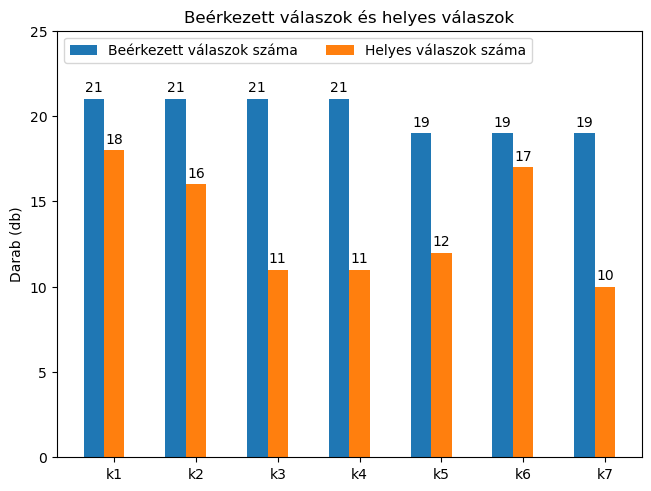

In [228]:
kerdesek = ('k1', 'k2', 'k3', 'k4', 'k5', 'k6', 'k7')
valaszok = {
    'Beérkezett válaszok száma': (21, 21, 21, 21, 19, 19, 19),
    'Helyes válaszok száma': (18, 16, 11, 11, 12, 17, 10),
}

x = np.arange(len(kerdesek))
width = 0.25
multiplier = 0

fig, ax = plt.subplots(layout='constrained')

for attribute, count in valaszok.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, count, width, label=attribute)
    ax.bar_label(rects, padding=3)
    multiplier += 1
    
ax.set_ylabel('Darab (db)')
ax.set_title('Beérkezett válaszok és helyes válaszok')
ax.set_xticks(x + width, kerdesek)
ax.legend(loc='upper left', ncols=3)
ax.set_ylim(0, 25)

plt.show()    
    

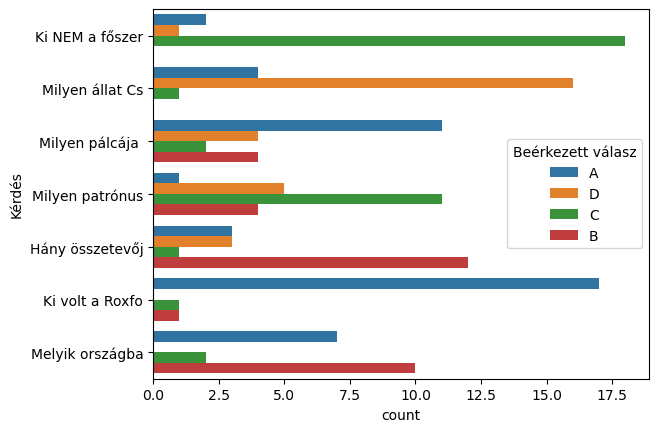

In [231]:
g = sns.countplot(y='Kérdés', data=df_ansqs, hue='Beérkezett válasz')

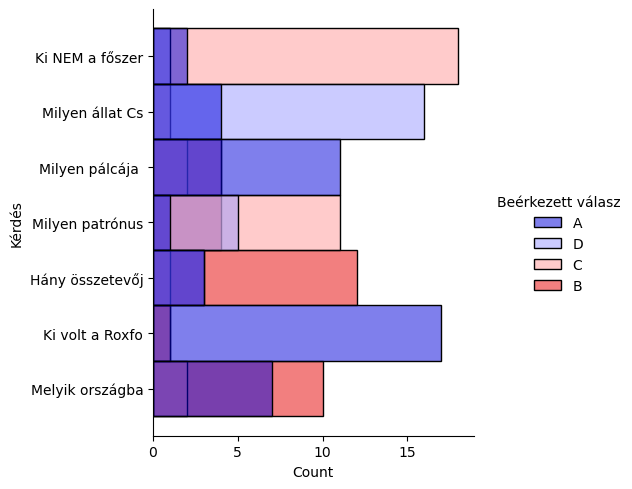

In [232]:
g = sns.displot(y='Kérdés', data=df_ansqs, hue='Beérkezett válasz', palette='seismic');

<Axes: xlabel='count', ylabel='Kérdés'>

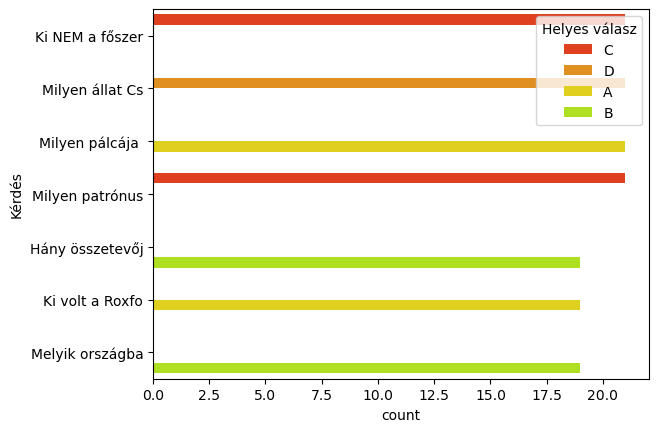

In [234]:
sns.countplot(y='Kérdés', data=df_ansqs, hue='Helyes válasz', palette='prism')

In [235]:
dfq1 = '''
SELECT
    Question.id,
    substr(Question.question, 1, 15) AS 'Kérdés',
    Question.correct_option AS 'Helyes válasz',
    Answer.selected_option AS 'Beérkezett válasz',
    SUM(CASE WHEN Answer.selected_option = Question.correct_option THEN 1 ELSE 0 END) AS 'Helyes válaszok száma',
    COUNT(Answer.selected_option) AS 'Beérkezett válaszok száma'    
FROM
    hp_quiz_app_question AS Question
JOIN
    hp_quiz_app_answer AS Answer ON (Answer.question_id = Question.id)
WHERE Question.id=11    
GROUP BY
    Kérdés, 'Helyes válasz';
'''

dfq1 = pd.read_sql_query(dfq1, conn)
dfq1.head()

,id,Kérdés,Helyes válasz,Beérkezett válasz,Helyes válaszok száma,Beérkezett válaszok száma
0,11,Ki NEM a főszer,C,A,18,21


In [236]:
dfq2 = '''
SELECT
    Question.id,
    substr(Question.question, 1, 15) AS 'Kérdés',
    Question.correct_option AS 'Helyes válasz',
    Answer.selected_option AS 'Beérkezett válasz',
    SUM(CASE WHEN Answer.selected_option = Question.correct_option THEN 1 ELSE 0 END) AS 'Helyes válaszok száma',
    COUNT(Answer.selected_option) AS 'Beérkezett válaszok száma'    
FROM
    hp_quiz_app_question AS Question
JOIN
    hp_quiz_app_answer AS Answer ON (Answer.question_id = Question.id)
WHERE Question.id=12    
GROUP BY
    Kérdés, 'Helyes válasz';
'''

dfq2 = pd.read_sql_query(dfq2, conn)
dfq2.head()

,id,Kérdés,Helyes válasz,Beérkezett válasz,Helyes válaszok száma,Beérkezett válaszok száma
0,12,Milyen állat Cs,D,D,16,21


In [237]:
dfq3 = '''
SELECT
    Question.id,
    substr(Question.question, 1, 15) AS 'Kérdés',
    Question.correct_option AS 'Helyes válasz',
    Answer.selected_option AS 'Beérkezett válasz',
    SUM(CASE WHEN Answer.selected_option = Question.correct_option THEN 1 ELSE 0 END) AS 'Helyes válaszok száma',
    COUNT(Answer.selected_option) AS 'Beérkezett válaszok száma'    
FROM
    hp_quiz_app_question AS Question
JOIN
    hp_quiz_app_answer AS Answer ON (Answer.question_id = Question.id)
WHERE Question.id=13    
GROUP BY
    Kérdés, 'Helyes válasz';
'''

dfq3 = pd.read_sql_query(dfq3, conn)
dfq3.head()

,id,Kérdés,Helyes válasz,Beérkezett válasz,Helyes válaszok száma,Beérkezett válaszok száma
0,13,Milyen pálcája,A,A,11,21


In [238]:
dfq4 = '''
SELECT
    Question.id,
    substr(Question.question, 1, 15) AS 'Kérdés',
    Question.correct_option AS 'Helyes válasz',
    Answer.selected_option AS 'Beérkezett válasz',
    SUM(CASE WHEN Answer.selected_option = Question.correct_option THEN 1 ELSE 0 END) AS 'Helyes válaszok száma',
    COUNT(Answer.selected_option) AS 'Beérkezett válaszok száma'    
FROM
    hp_quiz_app_question AS Question
JOIN
    hp_quiz_app_answer AS Answer ON (Answer.question_id = Question.id)
WHERE Question.id=14    
GROUP BY
    Kérdés, 'Helyes válasz';
'''

dfq4 = pd.read_sql_query(dfq4, conn)
dfq4.head()

,id,Kérdés,Helyes válasz,Beérkezett válasz,Helyes válaszok száma,Beérkezett válaszok száma
0,14,Milyen patrónus,C,C,11,21


In [239]:
dfq5 = '''
SELECT
    Question.id,
    substr(Question.question, 1, 15) AS 'Kérdés',
    Question.correct_option AS 'Helyes válasz',
    Answer.selected_option AS 'Beérkezett válasz',
    SUM(CASE WHEN Answer.selected_option = Question.correct_option THEN 1 ELSE 0 END) AS 'Helyes válaszok száma',
    COUNT(Answer.selected_option) AS 'Beérkezett válaszok száma'    
FROM
    hp_quiz_app_question AS Question
JOIN
    hp_quiz_app_answer AS Answer ON (Answer.question_id = Question.id)
WHERE Question.id=16    
GROUP BY
    Kérdés, 'Helyes válasz';
'''

dfq5 = pd.read_sql_query(dfq5, conn)
dfq5.head()

,id,Kérdés,Helyes válasz,Beérkezett válasz,Helyes válaszok száma,Beérkezett válaszok száma
0,16,Hány összetevőj,B,D,12,19


In [240]:
dfq6 = '''
SELECT
    Question.id,
    substr(Question.question, 1, 15) AS 'Kérdés',
    Question.correct_option AS 'Helyes válasz',
    Answer.selected_option AS 'Beérkezett válasz',
    SUM(CASE WHEN Answer.selected_option = Question.correct_option THEN 1 ELSE 0 END) AS 'Helyes válaszok száma',
    COUNT(Answer.selected_option) AS 'Beérkezett válaszok száma'    
FROM
    hp_quiz_app_question AS Question
JOIN
    hp_quiz_app_answer AS Answer ON (Answer.question_id = Question.id)
WHERE Question.id=17    
GROUP BY
    Kérdés, 'Helyes válasz';
'''

dfq6 = pd.read_sql_query(dfq6, conn)
dfq6.head()

,id,Kérdés,Helyes válasz,Beérkezett válasz,Helyes válaszok száma,Beérkezett válaszok száma
0,17,Ki volt a Roxfo,A,A,17,19


In [241]:
dfq7 = '''
SELECT
    Question.id,
    substr(Question.question, 1, 15) AS 'Kérdés',
    Question.correct_option AS 'Helyes válasz',
    Answer.selected_option AS 'Beérkezett válasz',
    SUM(CASE WHEN Answer.selected_option = Question.correct_option THEN 1 ELSE 0 END) AS 'Helyes válaszok száma',
    COUNT(Answer.selected_option) AS 'Beérkezett válaszok száma'    
FROM
    hp_quiz_app_question AS Question
JOIN
    hp_quiz_app_answer AS Answer ON (Answer.question_id = Question.id)
WHERE Question.id=18    
GROUP BY
    Kérdés, 'Helyes válasz';
'''

dfq7 = pd.read_sql_query(dfq7, conn)
dfq7.head()

,id,Kérdés,Helyes válasz,Beérkezett válasz,Helyes válaszok száma,Beérkezett válaszok száma
0,18,Melyik országba,B,B,10,19


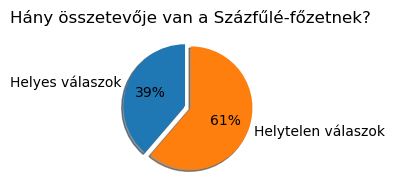

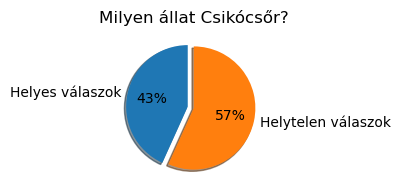

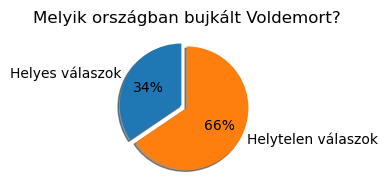

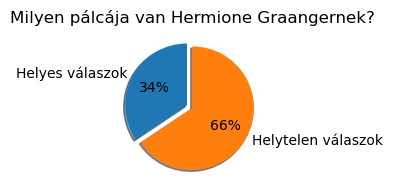

In [242]:
# Az adatkeret1 létrehozása 
data = {'values': [12, 19]}
dfq5 = pd.DataFrame(data)

# Pie plot1 létrehozása
plt.figure(figsize=(2, 2))
plt.pie(dfq5['values'], labels=['Helyes válaszok', 'Helytelen válaszok'], startangle=90,autopct='%.0f%%', shadow=True,
              explode=(0.1, 0.0))
plt.title('Hány összetevője van a Százfűlé-főzetnek?')
plt.show()

# Az adatkeret2 létrehozása 
data = {'values': [16, 21]}
dfq2 = pd.DataFrame(data)

# Pie plot2 létrehozása
plt.figure(figsize=(2, 2))
plt.pie(dfq2['values'], labels=['Helyes válaszok', 'Helytelen válaszok'], startangle=90,autopct='%.0f%%', shadow=True,
              explode=(0.1, 0.0))
plt.title('Milyen állat Csikócsőr?')
plt.show()

# Az adatkeret3 létrehozása 
data = {'values': [10, 19]}
dfq7 = pd.DataFrame(data)

# Pie plot3 létrehozása
plt.figure(figsize=(2, 2))
plt.pie(dfq7['values'], labels=['Helyes válaszok', 'Helytelen válaszok'], startangle=90,autopct='%.0f%%', shadow=True,
              explode=(0.1, 0.0))
plt.title('Melyik országban bujkált Voldemort?')
plt.show()

# Az adatkeret4 létrehozása 
data = {'values': [11, 21]}
dfq3 = pd.DataFrame(data)

# Pie plot4 létrehozása
plt.figure(figsize=(2, 2))
plt.pie(dfq3['values'], labels=['Helyes válaszok', 'Helytelen válaszok'], startangle=90,autopct='%.0f%%', shadow=True,
              explode=(0.1, 0.0))
plt.title('Milyen pálcája van Hermione Graangernek?')
plt.show()

In [243]:
df_completed_9_15 = '''
SELECT substr(Question.question, 1, 15) AS 'Kérdés', Question.correct_option AS 'Helyes válasz', Answer.selected_option AS 'Beérkezett válasz' 
FROM hp_quiz_app_question AS Question
JOIN hp_quiz_app_answer AS Answer
ON (Answer.question_id = Question.id)
WHERE Answer.id BETWEEN 9 AND 15;
'''

pd.read_sql_query(df_completed_9_15, conn)

# 9-15 id közötti válaszok

,Kérdés,Helyes válasz,Beérkezett válasz
0,Ki NEM a főszer,C,C
1,Milyen állat Cs,D,D
2,Milyen pálcája,A,A
3,Milyen patrónus,C,D
4,Hány összetevőj,B,D
5,Ki volt a Roxfo,A,A
6,Melyik országba,B,B


In [244]:
df_9_15 = '''
SELECT SUM(CASE WHEN Answer.selected_option = Question.correct_option THEN 1 ELSE 0 END) AS 'Helyes válaszok száma'
FROM hp_quiz_app_question AS Question
JOIN hp_quiz_app_answer AS Answer
ON (Answer.question_id = Question.id)
WHERE Answer.id BETWEEN 9 AND 15;
'''

pd.read_sql_query(df_9_15, conn)

# 9-15 id - helyes válaszok száma

,Helyes válaszok száma
0,5


In [245]:
df_completed_23_29 = '''
SELECT substr(Question.question, 1, 15) AS 'Kérdés', Question.correct_option AS 'Helyes válasz', Answer.selected_option AS 'Beérkezett válasz' 
FROM hp_quiz_app_question AS Question
JOIN hp_quiz_app_answer AS Answer
ON (Answer.question_id = Question.id)
WHERE Answer.id BETWEEN 23 AND 29;
'''

pd.read_sql_query(df_completed_23_29, conn)

# 23-29 id közötti válaszok

,Kérdés,Helyes válasz,Beérkezett válasz
0,Ki NEM a főszer,C,C
1,Milyen állat Cs,D,D
2,Milyen pálcája,A,A
3,Milyen patrónus,C,C
4,Hány összetevőj,B,B
5,Ki volt a Roxfo,A,A
6,Melyik országba,B,B


In [246]:
df_23_29 = '''
SELECT SUM(CASE WHEN Answer.selected_option = Question.correct_option THEN 1 ELSE 0 END) AS 'Helyes válaszok száma'
FROM hp_quiz_app_question AS Question
JOIN hp_quiz_app_answer AS Answer
ON (Answer.question_id = Question.id)
WHERE Answer.id BETWEEN 23 AND 29;
'''

pd.read_sql_query(df_23_29, conn)

# 23-29 id - helyes válaszok száma

,Helyes válaszok száma
0,7


In [247]:
df_completed_30_36 = '''
SELECT substr(Question.question, 1, 15) AS 'Kérdés', Question.correct_option AS 'Helyes válasz', Answer.selected_option AS 'Beérkezett válasz' 
FROM hp_quiz_app_question AS Question
JOIN hp_quiz_app_answer AS Answer
ON (Answer.question_id = Question.id)
WHERE Answer.id BETWEEN 30 AND 36;
'''

pd.read_sql_query(df_completed_30_36, conn)

# 30-36 id közötti válaszok

,Kérdés,Helyes válasz,Beérkezett válasz
0,Ki NEM a főszer,C,C
1,Milyen állat Cs,D,D
2,Milyen pálcája,A,D
3,Milyen patrónus,C,C
4,Hány összetevőj,B,B
5,Ki volt a Roxfo,A,A
6,Melyik országba,B,A


In [248]:
df_30_36 = '''
SELECT SUM(CASE WHEN Answer.selected_option = Question.correct_option THEN 1 ELSE 0 END) AS 'Helyes válaszok száma'
FROM hp_quiz_app_question AS Question
JOIN hp_quiz_app_answer AS Answer
ON (Answer.question_id = Question.id)
WHERE Answer.id BETWEEN 30 AND 36;
'''

pd.read_sql_query(df_30_36, conn)

# 30-36 id - helyes válaszok száma

,Helyes válaszok száma
0,5


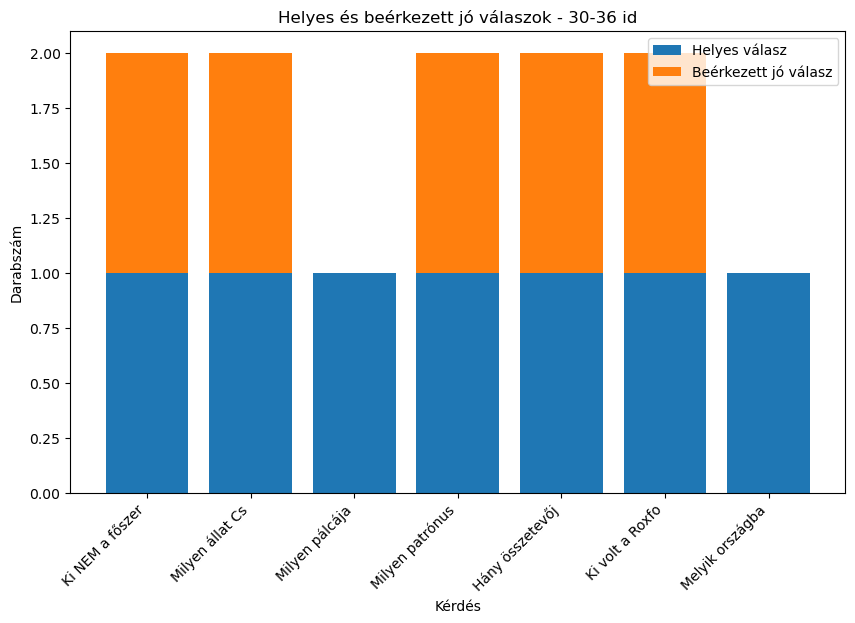

In [249]:
import matplotlib.pyplot as plt

# 30-36 id kitöltött 

data = {
    'Kérdés': ['Ki NEM a főszer', 'Milyen állat Cs', 'Milyen pálcája', 'Milyen patrónus', 'Hány összetevőj', 'Ki volt a Roxfo', 'Melyik országba'],
    'Helyes válasz': [1, 1, 1, 1, 1, 1, 1],
    'Beérkezett jó válasz': [1, 1, 0, 1, 1, 1, 0]
}

df = pd.DataFrame(data)

plt.figure(figsize=(10, 6))
plt.bar(df['Kérdés'], df['Helyes válasz'], label='Helyes válasz')
plt.bar(df['Kérdés'], df['Beérkezett jó válasz'], bottom=df['Helyes válasz'], label='Beérkezett jó válasz')
plt.xlabel('Kérdés')
plt.ylabel('Darabszám')
plt.title('Helyes és beérkezett jó válaszok - 30-36 id')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.show()


In [250]:
df_completed_37_43 = '''
SELECT substr(Question.question, 1, 15) AS 'Kérdés', Question.correct_option AS 'Helyes válasz', Answer.selected_option AS 'Beérkezett válasz' 
FROM hp_quiz_app_question AS Question
JOIN hp_quiz_app_answer AS Answer
ON (Answer.question_id = Question.id)
WHERE Answer.id BETWEEN 37 AND 43;
'''

pd.read_sql_query(df_completed_37_43, conn)

# 37-43 id közötti válaszok

,Kérdés,Helyes válasz,Beérkezett válasz
0,Ki NEM a főszer,C,D
1,Milyen állat Cs,D,C
2,Milyen pálcája,A,A
3,Milyen patrónus,C,B
4,Hány összetevőj,B,B
5,Ki volt a Roxfo,A,A
6,Melyik országba,B,A


In [251]:
df_37_43 = '''
SELECT SUM(CASE WHEN Answer.selected_option = Question.correct_option THEN 1 ELSE 0 END) AS 'Helyes válaszok száma'
FROM hp_quiz_app_question AS Question
JOIN hp_quiz_app_answer AS Answer
ON (Answer.question_id = Question.id)
WHERE Answer.id BETWEEN 37 AND 43;
'''

pd.read_sql_query(df_37_43, conn)

# 37-43 id - helyes válaszok száma

,Helyes válaszok száma
0,3


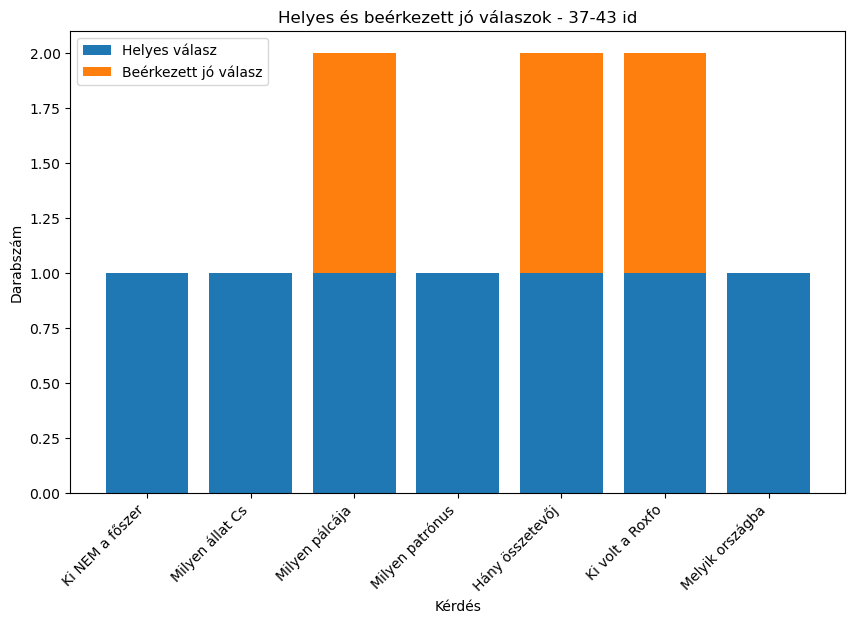

In [204]:
# 37-43 id - ábrán

data = {
    'Kérdés': ['Ki NEM a főszer', 'Milyen állat Cs', 'Milyen pálcája', 'Milyen patrónus', 'Hány összetevőj', 'Ki volt a Roxfo', 'Melyik országba'],
    'Helyes válasz': [1, 1, 1, 1, 1, 1, 1],
    'Beérkezett jó válasz': [0, 0, 1, 0, 1, 1, 0]
}

df = pd.DataFrame(data)

plt.figure(figsize=(10, 6))
plt.bar(df['Kérdés'], df['Helyes válasz'], label='Helyes válasz')
plt.bar(df['Kérdés'], df['Beérkezett jó válasz'], bottom=df['Helyes válasz'], label='Beérkezett jó válasz')
plt.xlabel('Kérdés')
plt.ylabel('Darabszám')
plt.title('Helyes és beérkezett jó válaszok - 37-43 id')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.show()

In [252]:
conn.close()